<a href="https://colab.research.google.com/github/GitData-GA/racelab/blob/main/tests/racelab_python_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import current library

In [2]:
pip install racelab

In [5]:
import sys
import os
#os.system('rm -rf racelab_dev')

!git clone https://github.com/GitData-GA/racelab.git racelab_dev
#sys.path.insert(0, './racelab_dev/src')

Cloning into 'racelab_dev'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 88 (delta 22), reused 64 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (88/88), 28.21 KiB | 1.41 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [3]:
import racelab as rl

# Development

## Test `load`

Source code: https://github.com/GitData-GA/racelab/blob/main/src/racelab/load.py

In [6]:
track = rl.load(path="racelab_dev/tests/test_track.npy")
track

array([[4.63079245, 1.97884398, 4.60918546, 1.6430465 , 4.58646449,
        1.30659668],
       [4.51560716, 2.00900785, 4.50431919, 1.67146498, 4.49181042,
        1.33321327],
       [4.40001729, 2.03760165, 4.39907455, 1.69846398, 4.3968202 ,
        1.35861867],
       ...,
       [4.85985363, 1.91368535, 4.8177669 , 1.58208603, 4.77484723,
        1.25013903],
       [4.74554313, 1.94704741, 4.71366143, 1.61320752, 4.68079913,
        1.27885319],
       [4.63079245, 1.97884398, 4.60918546, 1.6430465 , 4.58646449,
        1.30659668]])

## Test `plot`

Source code: https://github.com/GitData-GA/racelab/blob/main/src/racelab/plot.py

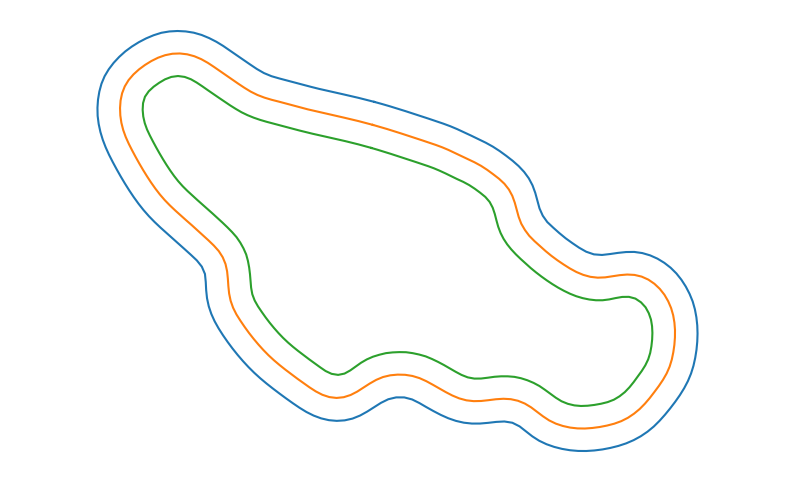

In [7]:
rl.plot(track)

## Test `optimize`

Source code: https://github.com/GitData-GA/racelab/blob/main/src/racelab/optimize.py

In [8]:
optimal = rl.optimize(track, 'k1999', line_iterations=2000, xi_iterations=5)

/usr/local/lib/python3.10/dist-packages/racelab/optimizer/utils/k1999.py:13: RuntimeWarning: invalid value encountered in scalar divide
  theta = np.arccos(np.dot(vec21, vec23) / (norm21 * norm23))
/usr/local/lib/python3.10/dist-packages/racelab/optimizer/utils/k1999.py:13: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.dot(vec21, vec23) / (norm21 * norm23))


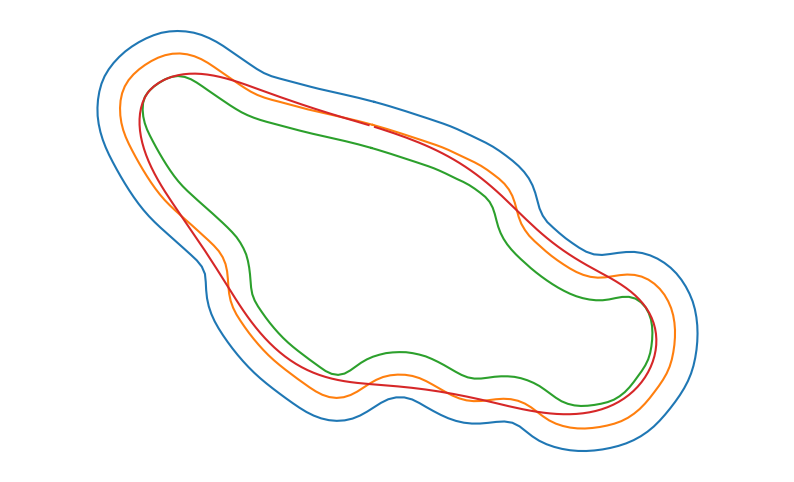

In [9]:
import numpy as np
rl.plot(np.hstack((track, optimal)))

# Push to GitHub

Make sure you have set up your GitHub token in this Colab notebook, which can be access through `userdata.get('gh_token')`.

In [1]:
import os
from datetime import datetime
from google.colab import userdata
import pytz
os.system('git config --global user.email "lyuan@gd.edu.kg"')
os.system('git config --global user.name "lygitdata"')
repo_url = f"https://{userdata.get('gh_token')}@github.com/GitData-GA/racelab.git"
os.system('rm -rf main')
os.system(f'git clone --branch main {repo_url} main')
source_dir = "drive/MyDrive/racelab-python/racelab/*"
destination_dir = "main"
os.system(f'cp -r {source_dir} {destination_dir}')
os.chdir('main')
os.system('git add .')
os.system(f'git commit -m "{datetime.now(pytz.timezone("UTC")).strftime("%Y/%m/%d - %H:%M:%S")} UTC"')
os.system('git push origin main')
os.system('rm -r main')
os.system('cd ..')

0